<a href="https://colab.research.google.com/github/D5Exp/Unsupervised-Learning-Sprint-2207FTDS-Team-JM6/blob/Nokukhanya/Unsupervised_Learing_Sprint_Team_JM6_Notebook_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learing Sprint Team JM6 Notebook

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

_____

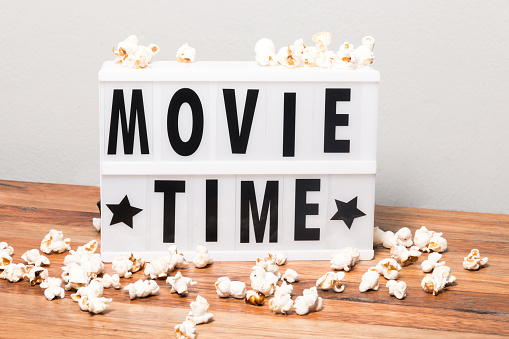

## What movie to watch today? 

The information age has seen an outstanding increase in the amount of decisions that consumers have to make. This includes trivial decisions such as 'what movie to watch?' that have become more difficult due to a vast number of options that are now available to the average consumer. For instance, if someone was looking for a movie to watch without any specific idea of what they wanted, there is a wide range of possibilities with regards to how the search may pan out. One could easily waste a lot of time browsing internet and scrolling through various sites and enormous libraries hoping to strike gold.

One way to combat this is to utilise Recommender Systems to predict the movies that an individual may like based on their historical preferences. A Recommendation System has the capability to learn a viewer's viewing patterns and subsequently, provide relevant suggestions that match these patterns.

Recommendation systems are beneficial to buyers of products as they direct their attention to what they enjoy or buy most. Moreover, recommendation systems have immense financial benefits for sellers, it is no surprise that major tech companies are capitalising on these benefits and thus applying them in some form or another to lure consumers.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Problem Statement</a>

<a href=#two>2. Comet - Start

<a href=#three>3. Importing Packages</a>

<a href=#four>4. The Data</a>

- <a href=#four.1>4.1 Loading the Data</a>

- <a href=#four.2>4.2 Data Description</a>
    
<a href=#five>5. Data Preprocessing</a>

- <a href=#five.1>5.1 Imputing Null Values</a>

- <a href=#five.2>5.2 Cleaning the Data</a>

<a href=#six>6 Feature Engineering</a>
    
<a href=#seven>7. Exploratory Data Analysis (EDA)</a>

- <a href=#seven.1>7.1 Univariate Analysis</a>

- <a href=#seven.2>7.2 Multivariate Analysis</a>

<a href=#eight>8. Modeling</a>

- <a href=#eight.1>8.1 Content-Based Filtering</a>
    
- <a href=#eight.2>8.2 Collaborative Filtering</a>

- <a href=#eight.3>8.3 Kaggle Submission</a>

<a href=#nine>9. Conclusion</a>
    
<a href=#ten>10. Comet - End</a>

<a href=#eleven>11. References</a>

 <a id="one"></a>
## 1. Problem Statement
<a href=#cont>Back to Table of Contents</a>

---
    


* In today’s technology driven world, recommender systems are socially and economically critical for ensuring that individuals can make appropriate choices surrounding the content they engage with on a daily basis. One application where this is especially true surrounds movie content recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.



* With this context, Explore-AI Academy has challenged our team, Team-JM6, to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences.

* Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being exposed to content they would like to view or purchase - generating revenue and platform affinity.

 <a id="two"></a>
## 2. Comet - Start
<a href=#cont>Back to Table of Contents</a>

---
    


In [ ]:
#!pip install comet_ml

In [ ]:
# import comet_ml at the top of your file
#from comet_ml import Experiment

# Create an experiment with your api key
#experiment = Experiment(
#    api_key="au99QesB5EGKDrtf2n0OT9JNR",
#    project_name="unsupervised-learning-sprint-2207ftds-team-jm6",
#    workspace="unsupervised-learning-sprint-2207ftds-team-jm6",
#    log_code=True
#)


 <a id="three"></a>
## 3. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
   

In [1]:
# Installing former EDSA cohort Hercules Smith surprise clone to make surprise module train 10x faster
#!pip install git+https://github.com/ProfHercules/Surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ProfHercules/Surprise to /tmp/pip-req-build-f8cdwkhl
  Running command git clone --filter=blob:none --quiet https://github.com/ProfHercules/Surprise /tmp/pip-req-build-f8cdwkhl
  Resolved https://github.com/ProfHercules/Surprise to commit 5e1d80acf26c65c8c03cdda9c4a0164159729d3f
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp38-cp38-linux_x86_64.whl size=2338805 sha256=9efceb5b78da38afbf4c10734eb88020822ff99a86a18fff0fde9778ded93810
  Stored in directory: /tmp/pip-ephem-wheel-cache-vi0cq09r/wheels/10/cf/ae/e6e9935bce85efeb1b80f2c3f0e92e1f835fc7a7e4d9a90903
Successfully built scikit-surprise


In [2]:
# Install packages here
# Packages for data processing
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp
import time
import ast

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.figsize":(15, 8)})
%matplotlib inline
from io import BytesIO
from PIL import Image


#Wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Packages for modeling
from surprise import Reader
from surprise import Dataset
from surprise import KNNWithMeans
from surprise import KNNBasic
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise.prediction_algorithms import KNNBaseline, SVDpp, BaselineOnly, KNNWithMeans, CoClustering, SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise import accuracy
import heapq
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import requests
import random

# Packages for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import time

# Package to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Packages for saving models
import pickle

<a id="four"></a>
## 4. The Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
   

In this section, the data stored in the team's github repository. Furthermore, the data descriptions will be provided. 

<a id="four.1"></a>
### 4.1 Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
   

**Supplied Files**

- genome_scores.csv - a score mapping the strength between movies and tag-related properties. 
- genome_tags.csv - user assigned tags for genome-related scores
- imdb_data.csv - Additional movie metadata scraped from IMDB using the links.csv file.
- links.csv - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
- tags.csv - User assigned for the movies within the dataset.
- test.csv - The test split of the dataset. Contains user and movie IDs with no rating data.
- train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data.

In [4]:
# Loading the data from the team's github repo

df_gscores = pd.read_csv("https://media.githubusercontent.com/media/Nokukhanya1208/Team-JM6-data/main/genome_scores.csv")
df_gtags = pd.read_csv("https://media.githubusercontent.com/media/Nokukhanya1208/Team-JM6-data/main/genome_tags.csv")
df_imdb = pd.read_csv("https://media.githubusercontent.com/media/Nokukhanya1208/Team-JM6-data/main/imdb_data.csv")
df_links = pd.read_csv("https://media.githubusercontent.com/media/Nokukhanya1208/Team-JM6-data/main/links.csv")
df_movies = pd.read_csv("https://media.githubusercontent.com/media/Nokukhanya1208/Team-JM6-data/main/movies.csv")
df_train = pd.read_csv("https://media.githubusercontent.com/media/Nokukhanya1208/Team-JM6-data/main/train.csv")
df_test = pd.read_csv("https://media.githubusercontent.com/media/Nokukhanya1208/Team-JM6-data/main/test.csv")
df_tags = pd.read_csv("https://media.githubusercontent.com/media/Nokukhanya1208/Team-JM6-data/main/tags.csv")


<a id="four.2"></a>
### 4.2 Data Description
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

   

In this section, the data will be briefly viewed and each data set will be explained in detail.

#### **train.csv**

In [ ]:
df_train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


Train data set

- UserId : Identifier for each user
- movieId : Identifier for movies used
- rating : Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).
- timestamp: represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

#### **test.csv**

In [ ]:
df_test.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


#### **genome_scores.csv**

In [ ]:
df_gscores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


Genome-scores data set

- movieId : Identifier for movies
- tagId : genome tag Identifier
- relevance : the relevance of a tag to a movie on a scale of 0-1

#### **genome_tags.csv**

In [ ]:
df_gtags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


Genome-tags data set

- tagId : Identifier for tags in a movie score
- tag : genome tag for each movie. A genome tag is a single characteristic exhibited by a movie (for example, atmospheric, thought-provoking, realistic, etc.)

#### **movies_csv**

In [ ]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Movies data set

- movieId : Identifier for each movie

- title : The title of movie, the title includes the year of release in parentheses.

- genres: Genres are a pipe-separated list, and include:

>> - Action
>> - Adventure
>> - Animation
>> - Children's
>> - Comedy
>> - Crime
>> - Documentary
>> - Drama
>> - Fantasy
>> - Film-Noir
>> - Horror
>> - Musical
>> - Mystery
>> - Romance
>> - Sci-Fi
>> - Thriller
>> - War
>> - Western
>> - (no genres listed)

#### **tags.csv**

In [ ]:
df_tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


Tags data set

- userId : Identifier for each user

- movieId : Identifier for each movie

- tag : User-generated metadata about movies. Each tag is typically a single word or short phrase.

- timestamp : represents seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970

#### **links.csv**


In [ ]:
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


Links data set

- movieId : Identifier for movies from imdb, website: https://movielens.org
- imdbId : Identifier for movies from imdb, webiste: http://www.imdb.com
- tmdbId : An identifier for movies from website: https://www.themoviedb.org.

#### **imdb_data.csv**

In [ ]:
df_imdb.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


imdb data set

- movieId : Identifier for each movie

- title_cast : The title_cast is a pipe-separated list of each movie title cast members

- director: The name of the director() of each movie title

- runtime: The movie title length in minutes

- budget: The movie title budget in dollars

- plot_keywords: The plot key words of each movie title, in a pipe-seperated list. Plot keywords are words or phrases that describe motifs, themes, character types, or plot details

<a id="five"></a>
## 5. Data Preprocessing 
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
   

Effective data preprocessing is a crucial step in any machine learning process, as it lays the foundation for meaningful exploratory data analysis and accurate modeling. By carefully preparing and cleaning the data, the data scientist can ensure that the visualizations accurately reflect the underlying patterns and trends, allowing for a deeper understanding of the data and more effective decision-making.

In this instance, the data will be preprocessed and engineered solely for exploratory data analysis and feature engineering purposes, to be later used in the modeling process. 

In [13]:
# To ensure we don't lose the original data, we will make a copy of the datasets

gscores = df_gscores.copy()
gtags = df_gtags.copy()
movies = df_movies.copy()
imdb = df_imdb.copy()
links = df_links.copy()
tags = df_tags.copy()
train = df_train.copy()
test = df_test.copy()

<a id="five.1"></a>
### 5.1 Imputing Null Values
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

   



Imputing null values in a DataFrame is done to handle missing data. These missing values can cause problems when trying to analyze or model the data, so imputation is used to fill in the missing values with plausible estimates. This allows the data to be used for its intended purpose without the problem of missing data causing issues.
 



First, the process begins by investigating data types and which columns contain null values. The next step is to determine whether to impute those null values or replace them with a '-'.

In [ ]:
# defining a function that will inspect each DataFrame 

def df_inspect(df):
    print("Dataframe Info:")
    print(df.info())
    print("\n")
    print("Columns with Null Values:")
    print(df.isnull().sum())


In [ ]:
# Check for null values in imdb DataFrame
df_inspect(imdb)

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB
None


Columns with Null Values:
movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64


In [ ]:
#tags data
df_inspect(tags)

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB
None


Columns with Null Values:
userId        0
movieId       0
tag          16
timestamp     0
dtype: int64


In [ ]:
df_inspect(links)

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int64  
 1   imdbId   62423 non-null  int64  
 2   tmdbId   62316 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB
None


Columns with Null Values:
movieId      0
imdbId       0
tmdbId     107
dtype: int64


- ***imdb data*** 

Now that the columns with null values have been identified, the next step is determining how to impute those null values. In the case of the imdb DataFrame, the "plot_keywords" column is of particular interest as it provides relevant information for content-based filtering of movies. In order to have more information on the plot of the movie, the null values in the "plot_keywords" column will be imputed by obtaining the corresponding tags from the genome tags DataFrame. These two columns provide keywords that describe the movie.

In [14]:
#First, we find the tags which have a relevance greater than 0.9 in the genome DataFrame

relevant_genome = pd.merge(gscores[gscores["relevance"]>0.9], gtags, how = 'left')
relevant_genome.head(3)

,movieId,tagId,relevance,tag
0,1,63,0.94725,animated
1,1,64,0.98425,animation
2,1,186,0.95475,cartoon


In [15]:
'''

- Next, a loop is implemented to iterate over each row in the "plot_keywords" column from the "imdb" dataframe.

- If the value in the "plot_keywords" column is NaN, the "movieId" in that row is used to subset the "relevant_genome" dataframe 
and sort the relevance in descending order.

- Then the top 5 tags are imputed in place of the NaN value in the "plot_keywords" column.

'''

for i in range(len(imdb["plot_keywords"])):
    if type(imdb["plot_keywords"][i])==float and pd.isna(imdb["plot_keywords"][i]):
        imdb["plot_keywords"][i] = '|'.join(str(x) for x in list(relevant_genome[relevant_genome["movieId"]==\
        relevant_genome["movieId"][i]].sort_values("relevance", ascending = False).head(5)["tag"])) 

In [16]:
# Confirm that there are no nulls in the plot_keywords column
print(f"There are ", imdb["plot_keywords"].isna().sum(), " null values in the plot_keywords column")

There are  0  null values in the plot_keywords column


The other columns of interest are "title_cast" and "director". These columns will also prove to be useful for the content-based filtering model. Unfortunately, the null values in those columns cannot be imputed with any values from any of the DataFrames. As a result, the null values will be imputed with "none".

In [17]:
imdb["title_cast"] = imdb["title_cast"].fillna("none")
imdb["director"] = imdb["director"].fillna("none")

In [18]:
# Confirming that there are no null values in both columns 
print(f"There are ", imdb["title_cast"].isna().sum(), " null values in the title_cast column")
print(f"There are ", imdb["director"].isna().sum(), " null values in the director column")

There are  0  null values in the title_cast column
There are  0  null values in the director column


- ***links data*** 

In the links DataFrame, there are null values in the "timdb" column, which contains values for image links. The null values will be handled during the feature engineering process where two additional columns with actual links to the movies and images will be added.

<a id="five.2"></a>
### 5.2 Cleaning the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

Fortunately, the data is relatively clean. However, some minimal data cleaning will be performed on certain columns.
This process includes removing the pipe symbols that appear in certain columns, such as "title_cast", "plot_keywords", etc.
The timestamp columns will also be changed into a more readable format.

- ***Removing pipe symbols***

In [19]:
# Defining a function that will remove the pipe symbols and return a list of strings

def split_pipe(string):
    if type(string) == str:
        return re.split("\|",string)


This function will then be applied to the following DataFrames and columns: 
- movies = "genres"
- imdb = "title_cast" & "plot_keywords"

In [20]:
movies["genres"] = movies["genres"].apply(split_pipe)
movies.head(2)

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"


In [21]:
imdb["title_cast"] = imdb["title_cast"].apply(split_pipe)
imdb["plot_keywords"] = imdb["plot_keywords"].apply(split_pipe)
imdb.head(2)

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,81.0,"$30,000,000","[toy, rivalry, cowboy, cgi animation]"
1,2,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Jonathan Hensleigh,104.0,"$65,000,000","[board game, adventurer, fight, game]"


- ***Changing timestamp format***

To make the timestamp columns more readable, they will be converted into the format: '%Y-%m-%d %H:%M:%S'.
A function will be defined to convert the relevant columns and then applied.

In [16]:
def date(epoch_time):
    return time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(epoch_time))

This function will then be applied to the following DataFrames and columns: 
- tags = "timestamp"
- train = "timestamp"

In [17]:
tags["timestamp"] = tags["timestamp"].apply(date)
tags.head(2)

,userId,movieId,tag,timestamp
0,3,260,classic,2015-08-13 13:25:55
1,3,260,sci-fi,2015-08-13 13:24:16


In [18]:
train["timestamp"] = train["timestamp"].apply(date)
train.head(2)

,userId,movieId,rating,timestamp
0,5163,57669,4.0,2018-02-11 11:53:12
1,106343,5,4.5,2008-03-23 02:18:59


The timestamp columns have been successfully converted into a more readable format. This marks the end of the data cleaning process. The next step is to proceed with feature engineering.

<a id="six"></a>
## 6. Feature Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

Feature engineering is the process of creating new features or transforming existing ones in a dataset to enhance the performance of machine learning models. It is a crucial step in the machine learning pipeline as the quality of the input features significantly affects the accuracy of the model. By creating new features or transforming existing ones, it's often possible to improve the performance of the model, even with a limited number of observations.

In this case, the team will be performing feature engineering on the following DataFrames:
- links
- movies

#### **Links**



During the data preprocessing phase, we mentioned that we will be able to deal with the null values in the links DataFrame in the feature engineering phase. 

The IMDB ID's are unique digits that range from lengths of 1 to 7, that, when in the right format, format a link that will direct you to the website where you can watch the movie. 
The website format is as follows: https://www.imdb.com/title/tt + 0*(7 - lenght of id) + id /

The TMDB ID's on the other hand, are unique digits that generate the movie poster. To recall earlier steps, when we inspected our DataFrame for nulls, we found that the "tmdbId" column had some null value occurences. To deal with this issue, we will generate the links using the values in the "tmdbId" column and where there are null values, we will generate a link to an image that states: "image not available".

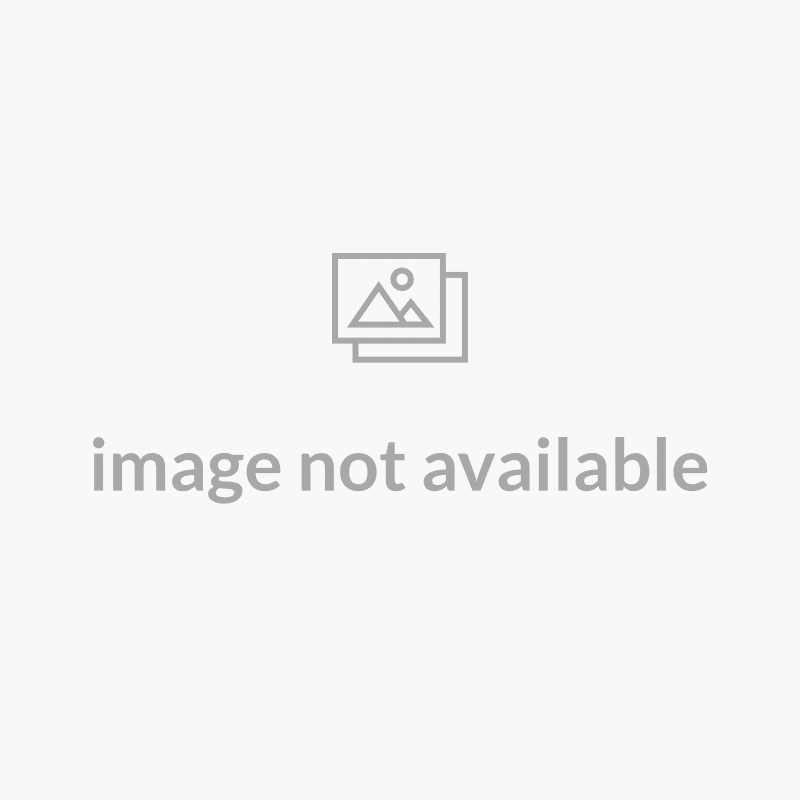

In [ ]:
# First we will start by generating links for the movie website by defining a function. 

#generate links for the links data

def website_links(string):
    length = len(str(string))
    return "https://www.imdb.com/title/tt"+"0"*(7 - length)+str(string)+"/"

In [ ]:
links["link"] = links["imdbId"].apply(website_links)
links.head(2)

,movieId,imdbId,tmdbId,link
0,1,114709,862.0,https://www.imdb.com/title/tt0114709/
1,2,113497,8844.0,https://www.imdb.com/title/tt0113497/


The next step is to generate poster links using the imdbId column. 

In [ ]:
'''Given a tmdbID the code below will generate the link to its poster, if it is unable to it will return an image stating
"image not available" '''

def movie_poster(movie_id):
    """generate poster link based on id"""
    try:
        url = f"https://api.themoviedb.org/3/movie/{movie_id}?api_key=8265bd1679663a7ea12ac168da84d2e8&language=en-US"
        data = requests.get(url)
        data = data.json()
        poster_path = data['poster_path']
        full_path = "https://image.tmdb.org/t/p/w500/" + poster_path
        return full_path
    except :
        return "https://i5.walmartimages.com/asr/4add4de6-7b92-4846-8316-b7a0cbec4dc7_1.8e2f7305081b9284e56d112fe146dc90.png"
    
    

In [ ]:
# links["images"] = links["tmdbId"].apply(fetch_poster)

The code above has been commented out because it took 5.5 hours to run. The results have been saved into a csv file that will be loaded below. The first few rows of the DataFrame will be displayed below.

In [11]:
df_links_final = pd.read_csv("https://media.githubusercontent.com/media/Nokukhanya1208/Team-JM6-data/main/links_final.csv")
df_links_final.head(2)

,Unnamed: 0,movieId,imdbId,tmdbId,link,images
0,0,1,114709,862.0,https://www.imdb.com/title/tt0114709/,https://image.tmdb.org/t/p/w500//uXDfjJbdP4ijW...
1,1,2,113497,8844.0,https://www.imdb.com/title/tt0113497/,https://image.tmdb.org/t/p/w500//vgpXmVaVyUL7G...


In [12]:
# dropping unnamed column

df_links_final = df_links_final.drop('Unnamed: 0', axis=1)
df_links_final.head(2)

,movieId,imdbId,tmdbId,link,images
0,1,114709,862.0,https://www.imdb.com/title/tt0114709/,https://image.tmdb.org/t/p/w500//uXDfjJbdP4ijW...
1,2,113497,8844.0,https://www.imdb.com/title/tt0113497/,https://image.tmdb.org/t/p/w500//vgpXmVaVyUL7G...


The feature engineering on the links DataFrame is completed. The next step is to move on to the movies DataFrame.

#### **Movies**

For the movies DataFrame, a new feature titled "year" will be created. This will be achieved by extracting the year in which the movie was released from the "title" column. In the event that the title doesn't include a year, the value in the "year" column will be 0.

To implement this, a function will be defined that will help to extract the year from the title and add it to the new feature that will be created.

In [22]:
# first, we define a function that extracts the year of the movie from the title

def extract_year(string):
    string = string.strip()
    year = re.findall(r'\s?\((\d{4})\)$', string)
    
    try :
        return year[0]
    except IndexError:
        return "0"  

In [23]:
movies["year"] = movies["title"].apply(extract_year)
movies["year"] = movies["year"].astype("int64")  #changing the column data type into integer
movies.head(2)

,movieId,title,genres,year
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",1995


The year column has been successfully created. 

This marks the end of the data preprocessing. The next step is to proceed with the exploratory data analysis (EDA).

<a id="seven"></a>
## 7. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

Exploratory data analysis (EDA) is an important step in the machine learning process because it helps to understand the characteristics of the data set and identify any potential issues or patterns. EDA helps to gain insights and understanding of the data, which can inform feature selection.

EDA also helps to ensure that the data is in a format that can be used effectively by the machine learning model, and to identify any additional data processing steps that may be needed. Overall, EDA is an essential step in machine learning as it helps to prepare the data for modeling and also helps to validate the assumptions made during the modeling process.


The EDA will be split into 2 secitons, namely:
- Univariate Analysis 
- Mulitvariate Analysis 

<a id="seven.1"></a>
### 7.1 Univariate Analysis
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

   



Univariate analysis is a statistical method that is used to analyze a single variable. It is used to describe the distribution of the data and to identify any patterns or outliers. This analysis helps to understand the characteristics of a single variable and to identify any trends or patterns in the data.

This univariate analysis will utilize graphical representations to examine the statistical properties of the data. To gain a deeper understanding, we will use specific questions as a guide to plotting and interpreting the visualizations.

#### 7.1.1. What is the distribution of the ratings? 

To answer this question, we will plot a distribution plot along with a box plot to visualize how the ratings are distributed. 

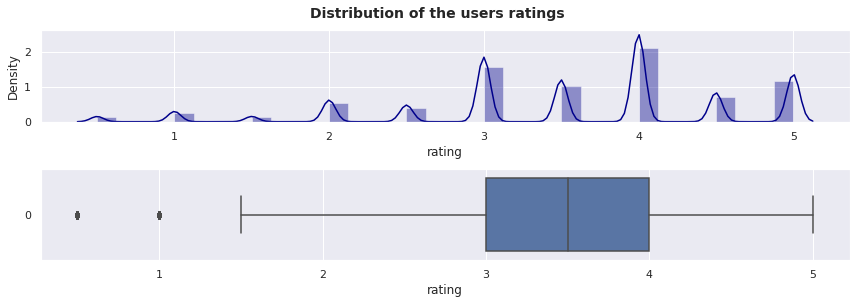

In [ ]:
# Distribution of user movie ratings

plot, axes = plt.subplots(2, 1, figsize=(12, 4))
plt.figtext(.51, .95, 'Distribution of the users ratings\n',
            fontsize=14, ha='center', fontweight='bold')

sns.distplot(train['rating'], hist=True, kde=True,
             bins=int(180/5), color='darkblue', ax=axes[0])

sns.boxplot(data=train['rating'],  orient='h', ax=axes[1])
plt.xlabel('rating')

plt.tight_layout()
plt.show()

**Plot Observations:**

- Our analysis of the rating column revealed a slight skewness, with a minimum rating of 0.5, a median rating of 3.5, and a maximum rating of 5. 
- The interquartile range showed that 50% of users gave a rating between 3 and 4.
- A low percentage of ratings are below 3. 

Given this plot, we can conclude that the most people are enjoying what they watch and are generous with their ratings.



#### 7.1.2 Which genre had the most movies? 

In [ ]:
# Create dataframe containing only the movieId and genres
movies_genres = pd.DataFrame(df_movies[['movieId', 'genres']],
                             columns=['movieId', 'genres'])

# Split genres seperated by "|" and create a list containing the genres allocated to each movie
movies_genres.genres = movies_genres.genres.apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie-genre combination is in a seperate row
movies_genres = pd.DataFrame([(tup.movieId, d) for tup in movies_genres.itertuples() for d in tup.genres],
                             columns=['movieId', 'genres'])

movies_genres.head()

,movieId,genres
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy


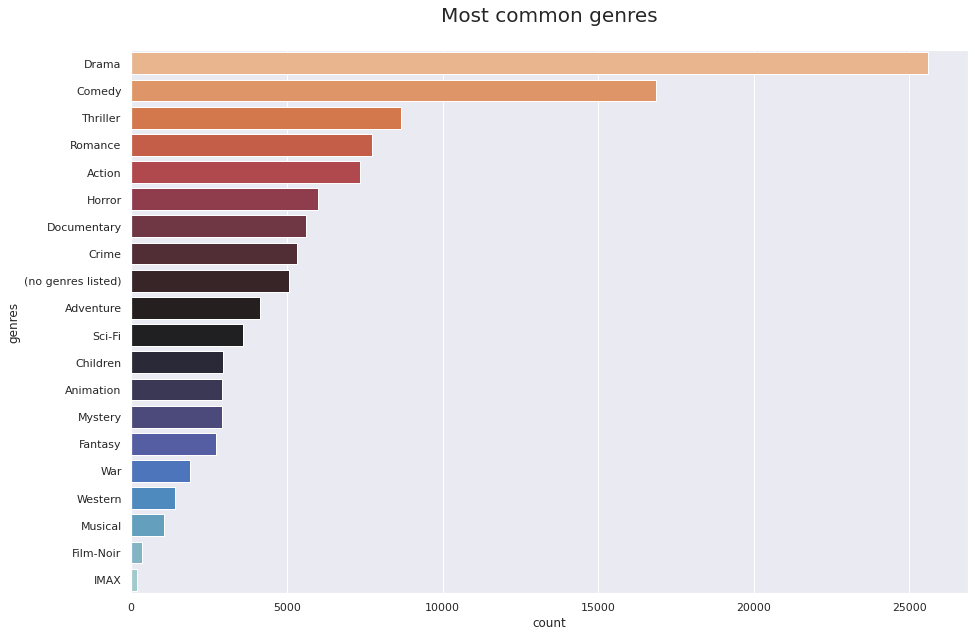

In [ ]:
# Plot the genres from most common to least common
plot = plt.figure(figsize=(15, 10))
plt.title('Most common genres\n', fontsize=20)
sns.countplot(y="genres", data=movies_genres,
              order=movies_genres['genres'].value_counts(ascending=False).index,
              palette='icefire_r')
plt.show()

**Plot Observations:** 

- There are 19 unique listed genres
- Drama (23%), Comedy (15%) and Thriller (8%) are the top 3 movie genres in the dataset.
- The least prevalent genres in the dataset are IMAX and Film-Noir, both with fewer than 500 occurrences. Notably, the IMAX genre represents a minuscule portion of the films, at less than 1%. This is understandable, given that IMAX is a relatively recent genre and the dataset spans a period of about 50 years.
- 5062 films have no genre listed which accounts for 5% of the movies in the dataset.



#### 7.1.3. How many movies were released in each year (1990-2019)? 

In [ ]:
#Using regular expressions to find a year stored between parentheses
#We specify the parantheses so we don’t conflict with movies that have years in their titles
df_movies['year'] = df_movies['title'].str.extract("(\(\d\d\d\d\))",expand=False)
#Removing the parentheses
df_movies['year'] = df_movies['year'].str.extract("(\d\d\d\d)",expand=False)
#Removing the years from the ‘title’ column
df_movies['title'] = df_movies['title'].str.replace("(\(\d\d\d\d\))", "")
#Applying the strip function to get rid of any ending whitespace characters that may have appeared
df_movies['title'] = df_movies['title'].apply(lambda x: x.strip())

In [ ]:
pd.to_datetime(df_movies.year, format='%Y')

0       1995-01-01
1       1995-01-01
2       1995-01-01
3       1995-01-01
4       1995-01-01
           ...    
62418   2018-01-01
62419   2001-01-01
62420   2018-01-01
62421   2001-01-01
62422   1962-01-01
Name: year, Length: 62423, dtype: datetime64[ns]

In [ ]:
year_df = pd.DataFrame(movies.groupby('year')['title'].count()).reset_index()
year_df.rename(columns={'title': 'num_of_titles'}, inplace=True)
year_df = year_df.sort_values(by='year', ascending=False)
year_df

,year,num_of_titles
135,2019,994
134,2018,2034
133,2017,2374
132,2016,2488
131,2015,2513
...,...,...
4,1883,1
3,1880,1
2,1878,1
1,1874,1


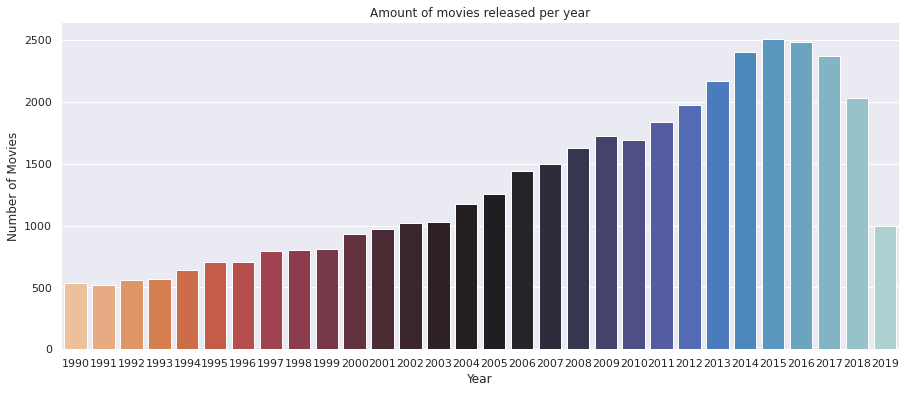

In [ ]:
# plot the highest rated movies
f, ax = plt.subplots(figsize=(15, 6))
sns.barplot(data=year_df[0:30],y='num_of_titles',x='year',palette = sns.color_palette('icefire_r', 30))
ax.set(ylabel="Number of Movies",
       xlabel="Year")
ax.title.set_text('Amount of movies released per year')
sns.despine(left=True, bottom=True)

**Plot Observations:**

We observed a gradual incline in the number of movies released in 2 decades. 

There are a few reasons for the increase in the number of movies released between 1990 and 2019. One major reason is the advancement of technology, which has made it cheaper and easier to produce and distribute films. Additionally, the growth of streaming services like Netflix and Amazon Prime has created a larger market for independent and niche films. Additionally, globalization and the increasing demand for entertainment in developing countries also played a role in the increase of movie production. Finally, the increasing popularity of franchises and sequels in Hollywood also contributed to the increase in the number of films released.


#### 7.1.4. Which movies are the most popular in the dataset? 

In [ ]:
# Create dataframe containing only the movieId and titles
movies_titles = pd.DataFrame(movies[['movieId', 'title']],
                             columns=['movieId', 'title'])

In [ ]:
# Most prefered movies by users groupby movie titles then count titles and also average ratings
users_pref = pd.merge(train, movies, on='movieId').drop(['timestamp'], axis=1)
#users_pref['year'] = pd.to_numeric(users_pref['year'])
users_pref.head(2)

,userId,movieId,rating,title,genres,year
0,5163,57669,4.0,In Bruges (2008),"[Comedy, Crime, Drama, Thriller]",2008
1,87388,57669,3.5,In Bruges (2008),"[Comedy, Crime, Drama, Thriller]",2008


In [ ]:
# Create dataframe with combination of ratings and movies

movie_avg_ratings = users_pref.groupby('movieId').agg(total_ratings=('movieId', 'size'),
                                                      average_rating=('rating', 'mean')).reset_index()
movie_avg_ratings = movie_avg_ratings.sort_values(['average_rating',
                                                   'total_ratings'], ascending=False)
movies_and_ratings = pd.merge(movie_avg_ratings,
                              movies_titles, on='movieId', how='left')                                                   
movies_and_ratings = pd.merge(movie_avg_ratings, movies_titles,
                              on='movieId', how='left')
years = movies_and_ratings.title.apply(lambda x: re.findall(r'\((.[\d]+)\)', x))
movies_and_ratings['year'] = years.str[-1]

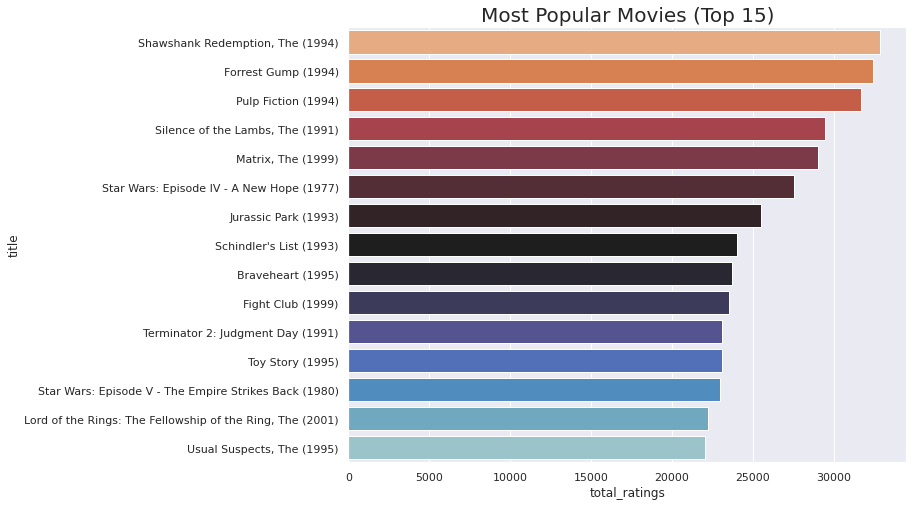

In [ ]:
# Plot of the movies with the most ratings
movie_plot = plt.figure(figsize=(10, 8))
plt.title('Most Popular Movies (Top 15)', fontsize=20)
sns.barplot(x='total_ratings', y='title',
            data=movies_and_ratings.sort_values('total_ratings',
                                                ascending=False)[0:15], palette='icefire_r')
plt.show()

**Plot observations:**

- Shawshank Redemption is the most rated movie in the dataset. 
- The top 10 consists of movies that viewers may term as "classics", such as The Matrix, Forrest Gump, Braveheart, etc. 
- Interestingly, the majority of the most popular movies were released mostly in the 90's. This could mean that "good movies" in the dataset were released in the earlier years. Alternatively, they could be the most popular movies merely because they have been around longer, and as a result, been rated more. 

#### 7.1.5 How many users are in the dataset?

In [ ]:
print('In our dataset there are \033[1m{}\033[0m number of users in the dataset,'.format(len(df_train['userId'].unique())))
print('with a total of \033[1m{}\033[0m movies rated.'.format(len(df_train['movieId'].unique())))

In our dataset there are 162541 number of users in the dataset,
with a total of 48213 movies rated.


#### 7.1.6. Which users gave the most ratings? 


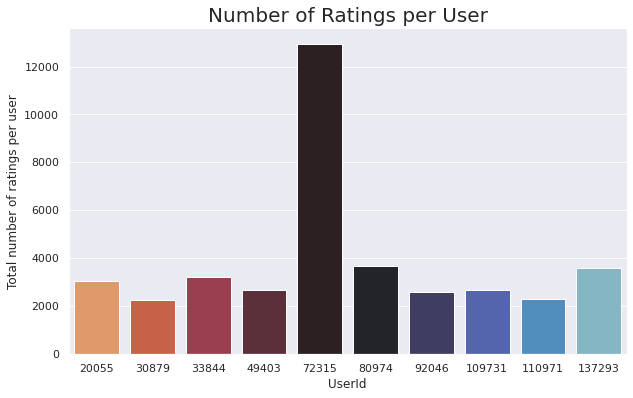

In [ ]:
userdata = pd.DataFrame(df_train["userId"].value_counts()).head(10)
plt.figure(figsize=(10, 6))
g = sns.barplot(x = userdata.index, y = userdata["userId"], palette='icefire_r')
g.set_ylabel("Total number of ratings per user")
g.set_xlabel("UserId")
plt.title("Number of Ratings per User", fontsize=20)
plt.show()

**Plot Observations:**

Our analysis shows that userID 72315 has an unusually high number of movie ratings in comparison to other users. To ensure the accuracy of our models, it may be necessary to exclude this userid during modeling and analysis to prevent skewing of the rating results.

This marks the end of the univariate analysis. The next step is to proceed with the multivariate analysis.

<a id="seven.2"></a>
### 7.2 Multivariate Analysis
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

   



Multivariate analysis is a set of statistical techniques used to analyze data that involves more than one variable. It allows researchers to examine the relationships between multiple variables, and can be used to identify patterns and make predictions.

In this multivariate analysis, graphical representations will be employed to analyze the statistical characteristics of the data. To gain a more comprehensive understanding, various variables will be examined and any significant relationships between them will be explored.

#### 7.2.1. Movie Runtime vs Ratings

In [ ]:
# Add the movie lenghts to the dataframe of interest
movies_and_ratings = pd.merge(movie_avg_ratings,
                              df_imdb[['movieId', 'runtime']],
                              on='movieId', how='left')

movies_and_ratings_RT = movies_and_ratings.dropna()

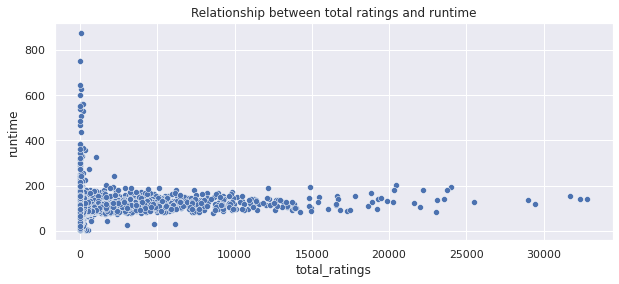

In [ ]:
# Use a scatter plot to view the relationship between movie length and rating
plot = plt.figure(figsize=(10, 4))
plt.title('Relationship between total ratings and runtime', fontsize=12)

sns.scatterplot(x=movies_and_ratings_RT['total_ratings'],
                y=movies_and_ratings_RT['runtime'], data=movies_and_ratings_RT)
plt.show()

**Plot Observations:**

There is no clear correlation between runtime and movie ratings. However, it is notable that films with longer runtimes tend to have fewer ratings.

#### 7.2.2 Most Common Plot Keywords

When dealing with text data, one of the most effective ways to visually analyze it is through word clouds. Word clouds can be used to quickly identify the main themes or topics of a text, making it a useful tool for text analysis, data visualization, and information design.

In [ ]:
#First lets create a corpus of all our plot keywords

plot_words = []

#We go through all our plot keywords in the imdb DataFrame and if it isnt a NaN value, we convert it to lowercase and append it to
#our corpus
for word in df_imdb["plot_keywords"]:
    if word is not np.nan:
        plot_words.append(re.sub("\s+" , " ", word).lower())
            
#Converting our list to a string            
plot_words = " ".join(plot_words)

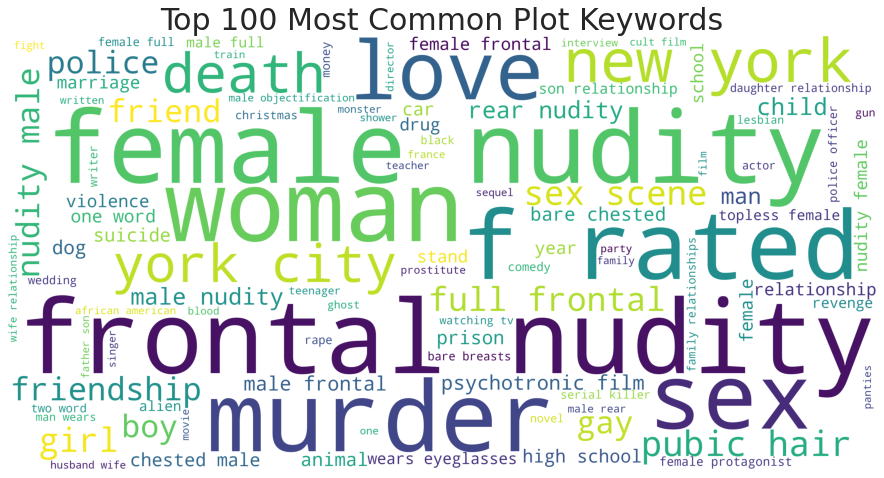

In [ ]:
#Creating a list of our own stop words
plot_stopwords = ['character', 'title', 'reference', 'name', 'in', 'based', 'directed'] + list(STOPWORDS)

#Creating our word cloud
title_wordcloud = WordCloud(stopwords=plot_stopwords, background_color='white', 
                            max_words=100, height=2000, width=4000).generate(plot_words)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.title("Top 100 Most Common Plot Keywords", fontsize=30)
plt.axis('off')
plt.show()


**Plot Observations:**

- The wordcloud above highlights some of the most prevalent plot keywords in our dataset. These keywords, such as "frontal nudity", "female nudity", "woman", and "murder", provide insight into the themes and motifs present in the movies.

- It is notable that "f rated" appears prominently in the wordcloud. An F rated film is one that is written or directed by a female film-maker, or features complex female characters who play a significant role in the story. This suggests that a significant portion of the movies in our dataset have female representation behind and in front of the camera.

- Also, the keyword "love" is prominently featured in the wordcloud. This is understandable as the genre "drama" is the most popular genre in the dataset and many drama films typically include a romantic plotline.

#### 7.2.3 Most Common Directors

In [ ]:
#First lets create a corpus of all our directors

directors_corpus = []

#We go through all our directors in the df_imdb column and if it isnt a NaN value, we convert it to lowercase and append it to
#our corpus
for director in df_imdb["director"]:
    if director is not np.nan:
        directors_corpus.append(re.sub("\s+" , "", director).lower())
            
#Converting our list to a string            
directors_corpus = " ".join(directors_corpus)

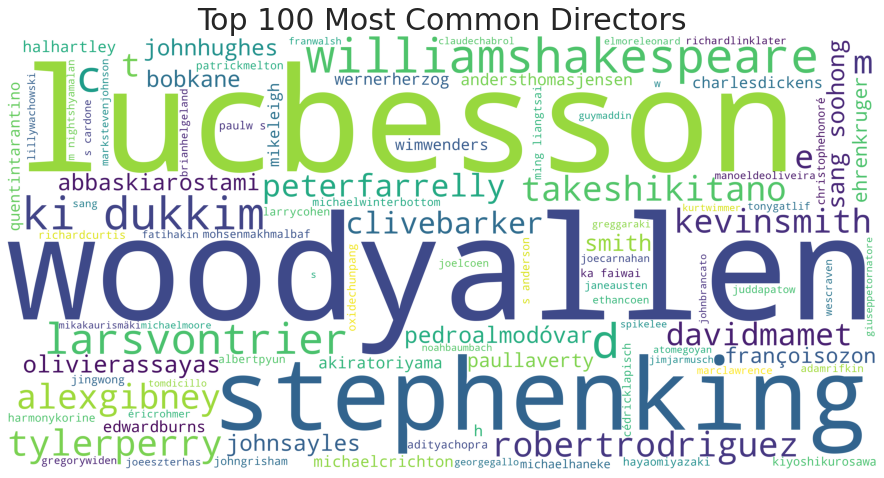

In [ ]:
#These are the stopwords we don't want to include in our word cloud
my_stopwords = ['none', ' none', 'none ', 'nan', ' nan', 'nan ', 'j', ' j', 'j ', 'jean', ' jean', 'jean ', 'seefullsummary',\
                ' seefullsummary', 'seefullsummary '] + list(STOPWORDS)


#Creating our word cloud
title_wordcloud = WordCloud(stopwords=my_stopwords, background_color='white', max_words=100, 
                            height=2000, width=4000).generate(directors_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.title("Top 100 Most Common Directors", fontsize=30)
plt.axis('off')
plt.show()

The wordcloud above reveals a selection of popular movie directors based on the number of films they have directed. The most prominent directors are Woody Allen, Luc Besson, and Stephen King.

- Woody Allen is an American film director, screenwriter, actor and author, known for his romantic comedy films with elements of parody and slapstick. He has won four Oscars in total, including three for Best Original Screenplay for Annie Hall (1977), Hannah and Her Sisters (1986), and Midnight in Paris (2011) and one for Best Director for Annie Hall. He has received 24 Academy Award nominations throughout his career, in categories including screenwriting, directing, and acting.

- Luc Besson is a French film director, screenwriter, and producer, known for his work on films such as Subway, The Big Blue, and La Femme Nikita. He is often associated with the Cinéma du look movement.

- Stephen King is an American novelist and short-story writer, who is credited with reviving the horror genre in the late 20th century. He also directed his own movie, Maximum Overdrive (1986) and 60 films have been made so far from Stephen King's books.

- Tyler Perry is another popular director featured in the wordcloud, known for directing films such as Acrimony and the Madea series. He now operates his own motion picture studio, Tyler Perry Studios.

#### 7.2.4 Most Common Actors & Actresses

In [ ]:
#First lets create a corpus of all our actors

actor_corpus = []

#We go through all our actors in the df_imdb column and if it isnt a None value, we convert it to lowercase and append it to
#our corpus
for title_cast in imdb["title_cast"]: 
    if title_cast is not None:
        for cast in title_cast:
            actor_corpus.append(re.sub("\s+" , "", cast).lower())
            
#Converting our list to a string            
actor_corpus = " ".join(actor_corpus)

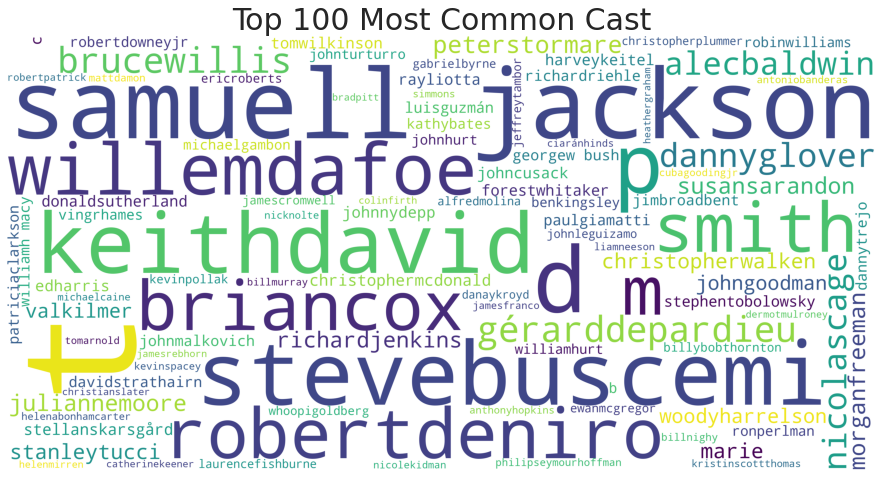

In [ ]:
#These are the stopwords we don't want to include in our word cloud
actor_stopwords = ['none', ' none', 'none ', 'nan', ' nan', 'nan ', 'j', ' j', 'j ', 'jean', ' jean', 'jean ', 'seefullsummary',\
                ' seefullsummary', 'seefullsummary '] + list(STOPWORDS)


#Creating our word cloud
title_wordcloud = WordCloud(stopwords=actor_stopwords, background_color='white', max_words=100, 
                            height=2000, width=4000).generate(actor_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.title("Top 100 Most Common Cast", fontsize=30)
plt.axis('off')
plt.show()

**Plot Observations:**

The actors wordcloud highlights some of the most popular actors in the movie industry based on their appearances in main and supporting roles. Among them, Samuel L. Jackson, Robert De Niro, Nicolas Cage, Bruce Willis, Gérard Depardieu and Johnny Depp stand out. This is in line with the findings that the drama and action genres are the most popular among viewers.

- Samuel L. Jackson is an American actor and film producer who has starred in some of the highest grossing films of all time, including Jurassic Park (1993), Pulp Fiction (1994) and the Star Wars prequel trilogy. He has also been recognized as the highest-grossing live-action actor of all time as of 2022.

- Robert De Niro is another prominent actor in the wordcloud, known for his powerful performances in films like The Godfather Part II (1974) and his collaborations with filmmaker Martin Scorsese. He has received numerous accolades throughout his career, including two Academy Awards.

- Nicolas Cage is also a notable actor in the wordcloud, famous for his role as Neo in the classic film The Matrix trilogy.

- Other notable actors featured in the wordcloud include Bruce Willis, Johnny Depp, Gérard Depardieu (the highest grossing French actor), and Morgan Freeman, whose film The Shawshank Redemption is the most popular in our dataset.



---



---



With the completion of our exploratory data analysis, we have uncovered valuable insights from the dataset. These insights will now guide us as we move forward to the next step of our project: constructing the recommender systems.

<a id="eight"></a>
## 8. Modeling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    


ecommender systems are a type of artificial intelligence algorithm used to make personalized recommendations to users. These systems are commonly used in e-commerce, media, and other applications where it is important to surface relevant content to users.

There are several types of recommender systems, there are two types of recommendation systems we will be considering, namely:

1. Content-based filtering, which makes recommendations based on the characteristics of the items a user has liked in the past.
2. Collaborative filtering, which makes recommendations based on the past behavior of users similar to the current user.

The basic idea behind these systems is to use the historical data of users' interactions with a product or service, such as browsing history, purchase history, or ratings, to make recommendations. The system takes this data and compares it to other users' data to identify patterns and make predictions about what the current user might like.

Recommender systems can be used to suggest personalized products, content, or services to users based on their individual preferences and behavior. These systems can help increase customer satisfaction, reduce churn, and increase revenue.

It's worth noting that these systems also have a drawback, which is the potential to perpetuate bias or reinforce echo-chambers, as they are only able to make recommendations based on the data they've been trained on.

<a id="eight.1"></a>
### 8.1 Content-Based Filtering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---



**What is Content-based filtering?**

Content-based filtering is a method used in recommendation systems to recommend items to users based on the features or properties of the items themselves. It works by analyzing the content of the items and comparing them to the user's preferences or past behavior to identify similar items that the user might like. 

For example, a movie recommendation system that uses content-based filtering would recommend movies to a user based on the genres, actors, and directors of the movies that the user has previously watched.

**Techniques used for our content-based filtering:**

To implement our content-based filtering, we employed the use of CountVectorizer for feature extraction. This technique converts text into numerical vectors, which allows us to effectively compare and analyze the content of different items. We chose to use CountVectorizer instead of tf-idf Vectorizer to ensure that keywords, directors, and genres are not penalized for their frequency in the dataset. This is because a high count does not necessarily indicate a lack of importance for a particular feature.

We also made use of cosine similarity. Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. The cosine of 0° is 1, and it is less than 1 for any other angle. In the context of recommendation systems, cosine similarity is used to compare the feature vectors of different items (in this case, movies) and determine how similar they are.

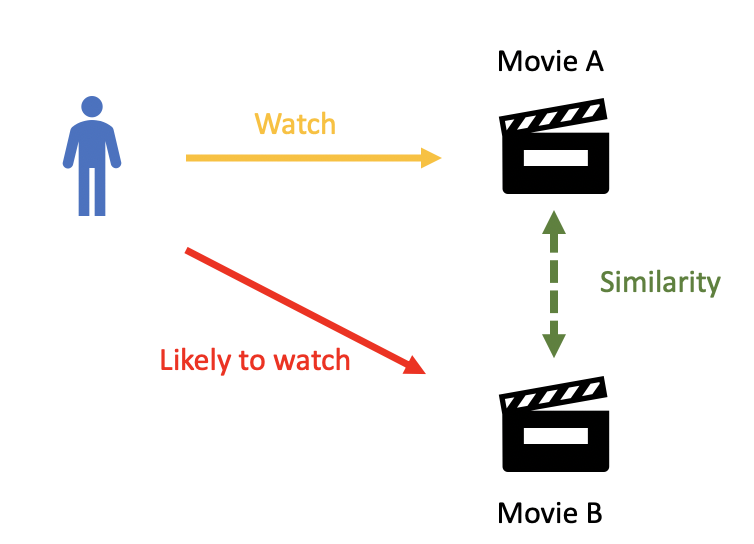

image source: https://miro.medium.com/max/1400/1*Lr6qL0YjY_WqVK5u-AYHAQ.png

#### 8.1.1 Preparing the Modeling Data

Our content-based filtering recommender system will take into account various features such as:
- cast
- director
- genre
- plot keywords

Furthermore, to enhance the user experience, the recommendations provided will include not only the movie title but also the movie poster and a direct link to the IMDb website for easy access and viewing. 

By focusing on just these four features, while our dataset may be smaller, the recommendation accuracy will be significantly improved.

In [25]:
# To have these attributes in one dataframe we merge the df_movies and df_imdb database

model_data = pd.merge(left=df_movies[["movieId","title","genres"]],right=\
                          df_imdb[["movieId","title_cast","director","plot_keywords"]],on='movieId')\
.apply(lambda x: x.astype(str))

In [26]:
model_data.head()

,movieId,title,genres,title_cast,director,plot_keywords
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation
1,2,Jumanji (1995),Adventure|Children|Fantasy,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,board game|adventurer|fight|game
2,3,Grumpier Old Men (1995),Comedy|Romance,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,boat|lake|neighbor|rivalry
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,black american|husband wife relationship|betra...
4,5,Father of the Bride Part II (1995),Comedy,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,fatherhood|doberman|dog|mansion


In [27]:
#defining a function that will remove the pipe symbols, and split the words

def split_words(string):
    if type(string) == str:
      return " ".join(string.split("|"))


In [28]:
model_data["genres"] = model_data["genres"].apply(split_words)
model_data["title_cast"] = model_data["title_cast"].apply(split_words)
model_data["plot_keywords"] = model_data["plot_keywords"].apply(split_words)

In [29]:
model_data.head(2)

,movieId,title,genres,title_cast,director,plot_keywords
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,Tom Hanks Tim Allen Don Rickles Jim Varney Wal...,John Lasseter,toy rivalry cowboy cgi animation
1,2,Jumanji (1995),Adventure Children Fantasy,Robin Williams Jonathan Hyde Kirsten Dunst Bra...,Jonathan Hensleigh,board game adventurer fight game


In [ ]:
# combining our features in one column

model_data["combined_features"] = model_data["genres"] + " " + model_data["title_cast"] + " " + \
model_data["plot_keywords"] + " " + model_data["director"]


In [61]:
model_data.head(10)

,movieId,title,genres,title_cast,director,plot_keywords,combined_features
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,Tom Hanks Tim Allen Don Rickles Jim Varney Wal...,John Lasseter,toy rivalry cowboy cgi animation,Adventure Animation Children Comedy Fantasy To...
1,2,Jumanji (1995),Adventure Children Fantasy,Robin Williams Jonathan Hyde Kirsten Dunst Bra...,Jonathan Hensleigh,board game adventurer fight game,Adventure Children Fantasy Robin Williams Jona...
2,3,Grumpier Old Men (1995),Comedy Romance,Walter Matthau Jack Lemmon Sophia Loren Ann-Ma...,Mark Steven Johnson,boat lake neighbor rivalry,Comedy Romance Walter Matthau Jack Lemmon Soph...
3,4,Waiting to Exhale (1995),Comedy Drama Romance,Whitney Houston Angela Bassett Loretta Devine ...,Terry McMillan,black american husband wife relationship betra...,Comedy Drama Romance Whitney Houston Angela Ba...
4,5,Father of the Bride Part II (1995),Comedy,Steve Martin Diane Keaton Martin Short Kimberl...,Albert Hackett,fatherhood doberman dog mansion,Comedy Steve Martin Diane Keaton Martin Short ...
5,6,Heat (1995),Action Crime Thriller,Al Pacino Robert De Niro Val Kilmer Jon Voight...,Michael Mann,gun battle organized crime honor criminal inve...,Action Crime Thriller Al Pacino Robert De Niro...
6,7,Sabrina (1995),Comedy Romance,Harrison Ford Julia Ormond Greg Kinnear Nancy ...,Samuel A. Taylor,character name as title chauffeur estate playboy,Comedy Romance Harrison Ford Julia Ormond Greg...
7,8,Tom and Huck (1995),Adventure Children,Jonathan Taylor Thomas Brad Renfro Eric Schwei...,Mark Twain,rescue from drowning near drowning character n...,Adventure Children Jonathan Taylor Thomas Brad...
8,9,Sudden Death (1995),Action,Jean-Claude Van Damme Powers Boothe Raymond J....,Karen Elise Baldwin,hockey death in title two word title terrorist,Action Jean-Claude Van Damme Powers Boothe Ray...
9,10,GoldenEye (1995),Action Adventure Thriller,Pierce Brosnan Sean Bean Izabella Scorupco Fam...,Ian Fleming,official james bond series james bond characte...,Action Adventure Thriller Pierce Brosnan Sean ...


In [31]:
#Converting our movieId to an interger
model_data["movieId"] = model_data["movieId"].astype("int64")

 #### 8.1.2 Similarity Matrix

As mentioned earlier, we will make use of the CountVectorizer instead of the tf-idf Vectorizer to ensure that keywords, directors, and genres are not penalized for their frequency in the dataset.

In [32]:
count = CountVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
count_matrix = count.fit_transform(model_data["combined_features"])

In [33]:
# To save space:
count_matrix = count_matrix.astype("float32")

In [34]:
#Now we create a similarity matrix between the vectors (movie information)
cosine_sim = cosine_similarity(count_matrix, count_matrix)

#### 8.1.3 Model

As mentioned earlier, we will make use of the links data as well, to enhance user experience.

In [38]:
df_model = pd.merge(model_data, df_links_final[["movieId", "link", "images"]], how = "left").reset_index()
df_model = df_model.drop("index", axis = 1)
df_model.head(3)

,movieId,title,genres,title_cast,director,plot_keywords,combined_features,link,images
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,Tom Hanks Tim Allen Don Rickles Jim Varney Wal...,John Lasseter,toy rivalry cowboy cgi animation,Adventure Animation Children Comedy Fantasy To...,https://www.imdb.com/title/tt0114709/,https://image.tmdb.org/t/p/w500//uXDfjJbdP4ijW...
1,2,Jumanji (1995),Adventure Children Fantasy,Robin Williams Jonathan Hyde Kirsten Dunst Bra...,Jonathan Hensleigh,board game adventurer fight game,Adventure Children Fantasy Robin Williams Jona...,https://www.imdb.com/title/tt0113497/,https://image.tmdb.org/t/p/w500//vgpXmVaVyUL7G...
2,3,Grumpier Old Men (1995),Comedy Romance,Walter Matthau Jack Lemmon Sophia Loren Ann-Ma...,Mark Steven Johnson,boat lake neighbor rivalry,Comedy Romance Walter Matthau Jack Lemmon Soph...,https://www.imdb.com/title/tt0113228/,https://image.tmdb.org/t/p/w500//1FSXpj5e8l4KH...


In [48]:
def content_model(movie_list,top_n=10):
    
    """Performs Content filtering based upon a list of movies supplied
       by the app user.

    Parameters
    ----------
    movie_list : list (str)
        Favorite movies chosen by the app user.
    top_n : type
        Number of top recommendations to return to the user.

    Returns
    -------
    list (str)
        Titles of the top-n movie recommendations to the user.

    """
    # Initializing the empty list of recommended movies
    recommended_movies = []
    indices = pd.Series(df_model['title'])
    
    # Getting the index of the movie that matches the title
    idx_1 = indices[indices == movie_list[0]].index[0]
    idx_2 = indices[indices == movie_list[1]].index[0]
    idx_3 = indices[indices == movie_list[2]].index[0]
    
    # Creating a Series with the similarity scores in descending order
    rank_1 = cosine_sim[idx_1]
    rank_2 = cosine_sim[idx_2]
    rank_3 = cosine_sim[idx_3]
    
    # Calculating the scores
    score_series_1 = pd.Series(rank_1).sort_values(ascending = False)
    score_series_2 = pd.Series(rank_2).sort_values(ascending = False)
    score_series_3 = pd.Series(rank_3).sort_values(ascending = False)
    
    # Getting the indexes of the 10 most similar movies
    listings = score_series_1.append(score_series_1).append(score_series_3).sort_values(ascending = False)

    # Store movie names
    recommended_movies = []
    
    # Appending the names of movies
    top_50_indexes = list(listings.iloc[1:50].index)
    
    # Removing chosen movies
    top_indexes = np.setdiff1d(top_50_indexes,[idx_1,idx_2,idx_3])
    for i in top_indexes[:top_n]:
        recommended_movies.append(list(df_model['title'])[i])
        
    titles = df_model[df_model["title"].isin(recommended_movies)]
    
    for i in titles["title"]:
    
        image = list(df_model[df_model["title"] == i]["images"])[0]
        title = list(df_model[df_model["title"] == i]["title"])[0]
        link = list(df_model[df_model["title"] == i]["link"])[0]

        display(Image.open(BytesIO(requests.get(image).content)).resize((150,150)))

        print("Title: ", title)
        print("For more information about this movie, click on: ", link,"\n" )

Because you picked:

1)  Riding in Cars with Boys (2001)
2)  Wild Horses (Caballos salvajes) (1995)
3)  Twonky, The (1953) 

You may enjoy the following titles:


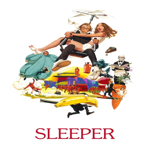

Title:  Sleeper (1973)
For more information about this movie, click on:  https://www.imdb.com/title/tt0070707/ 



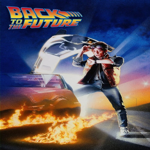

Title:  Back to the Future (1985)
For more information about this movie, click on:  https://www.imdb.com/title/tt0088763/ 



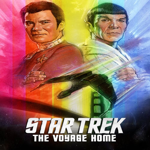

Title:  Star Trek IV: The Voyage Home (1986)
For more information about this movie, click on:  https://www.imdb.com/title/tt0092007/ 



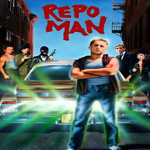

Title:  Repo Man (1984)
For more information about this movie, click on:  https://www.imdb.com/title/tt0087995/ 



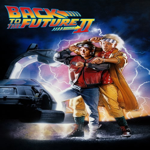

Title:  Back to the Future Part II (1989)
For more information about this movie, click on:  https://www.imdb.com/title/tt0096874/ 



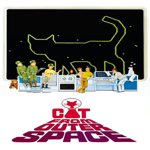

Title:  Cat from Outer Space, The (1978)
For more information about this movie, click on:  https://www.imdb.com/title/tt0077305/ 



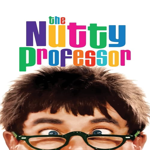

Title:  Nutty Professor, The (1963)
For more information about this movie, click on:  https://www.imdb.com/title/tt0057372/ 



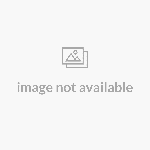

Title:  Cocoon (1985)
For more information about this movie, click on:  https://www.imdb.com/title/tt0088933/ 



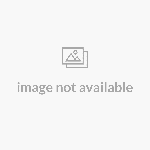

Title:  Cocoon: The Return (1988)
For more information about this movie, click on:  https://www.imdb.com/title/tt0094890/ 



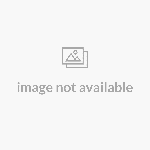

Title:  Howard the Duck (1986)
For more information about this movie, click on:  https://www.imdb.com/title/tt0091225/ 



In [67]:
#Lets try this the first 3 movies of our df_model dataframe 
#Feel free to select your own movies from the df_model dataframe and set them equal to movie1, movie2 and movie3

movie1 = df_model["title"][random.randint(0, 5000)]
movie2 = df_model["title"][random.randint(5001, 15000)]
movie3 = df_model["title"][random.randint(15001, 20000)]

print ("Because you picked:\n")
print("1) ", movie1)
print("2) ", movie2)
print("3) ", movie3, "\n")

print("You may enjoy the following titles:")

content_model([movie1, movie2, movie3 ])

<a id="eight.2"></a>
### 8.2 Collaborative Filtering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
   



**What is Collaborative Filtering?**

Collaborative filtering is a method of making recommendations by analyzing the preferences and behavior of similar users. It works by identifying a group of users whose tastes and preferences are similar to a particular user and using their past behavior to create a ranked list of suggestions. 

In essence, it operates on the principle that individuals with similar tastes and preferences will have similar ratings for items. For example, if two users have a history of liking similar movies, it can be inferred that they may also enjoy other films that the other user has liked in the past.

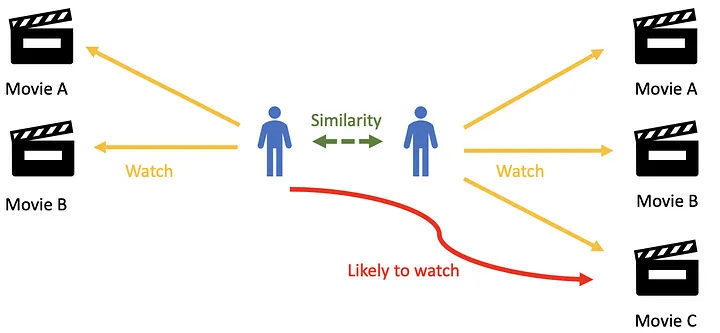

image source: https://miro.medium.com/max/1400/1*2_eaF6211RoGZBvZAm_sEQ.png

**Collaborative filtering offers several benefits, including:**

- Personalization: It considers the ratings and preferences of other users to make more relevant recommendations.

- Ease of use: It does not require any detailed information about the items being recommended.

- Adaptability: It can adapt to changes in a user's interests over time, making the recommendations more accurate.

**How will we measure the accuracy of the ratings we calculate?**

To measure the accuracy of the ratings we calculate, we will use the Root Mean Square Error (RMSE) method. This method involves predicting ratings for a test dataset of user-item pairs, where the true rating values are already known. The difference between the predicted and known values is calculated as the error. We will then square these error values, find their average, and take the square root of that average to determine the RMSE value.

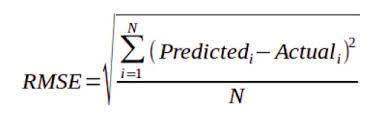

image source: https://media.geeksforgeeks.org/wp-content/uploads/20200622171741/RMSE1.jpg

**Models Considered**

In this project, we will explore the use of three matrix factorization models:

1. The Singular Value Decomposition (SVD) algorithm, which is a technique that reduces the number of features in a dataset by decomposing it into a product of matrices. This method is particularly useful for datasets where each row represents a user and each column represents a movie, and the matrix elements are ratings given by users to movies.

2. The Non-negative Matrix Factorization (NMF) algorithm, which is based on Principal Component Analysis (PCA) and is widely used for extracting sparse and significant features from high-dimensional non-negative data vectors.

3. The SlopeOne algorithm, a collaborative filtering approach that employs a simple linear regression model to address data sparsity and reduce overfitting, resulting in improved performance.


**Technique:**

We will make use of the Surprise Library. The "surprise" library is a Python library for building and analyzing recommender systems that is built on top of scikit-learn. It offers many built-in algorithms for collaborative filtering and other recommendation techniques, as well as utilities for evaluating the performance of a recommender system. It also provides a convenient wrapper for using scikit-learn's machine learning models with surprise's built-in datasets and evaluation tools.

To accelerate the computation time of our models, we have opted to install Prof. Hercules' (former EDSA student) version of suprise. For more information on this Surprise modification, visit the website: https://nullsafe.dev/posts/how-to-make-surprise-10x-faster/



#### 8.2.1 Preparing the Modeling Data

For our Collaborative Filtering recommenders, we will be considering the following features: 

- userId
- movieId
- rating

In order to optimize the performance of our models, we will utilize a subset of our data, specifically 1% or 100,000 samples, during training.

In [5]:
df = df_train[["userId", "movieId", "rating"]]
df.head(2)

,userId,movieId,rating
0,5163,57669,4.0
1,106343,5,4.5


In [6]:
# creating our subset data
df_sample = df.head(100000)
df_sample.shape

(100000, 3)

In [7]:
#Defining a reader to parse our dataframe containing ratings.

reader = Reader(rating_scale=(df_sample['rating'].min(), df_sample['rating'].max()))

In [8]:
#Loading our dataset from our dataframe

data = Dataset.load_from_df(df_sample, reader)

#### 8.2.2 Model Performance Comparison


In the next step, we will create a table to compare the Root Mean Squared Error (RMSE) and training time for each of the four algorithms.

We will train all the algorithms using a subset of the data with the "untuned or basic" configurations to evaluate their performance.
To evaluate the performance of the models, we will use Cross Validation, which will allow us to observe the model's predictions against all instances in the dataset. This will ensure that the model has been tested on the entire data, without testing them simultaneously.
As variations are expected in each step of the validation, computing the mean and standard deviation will provide a clear comparison of the performance of each model.

In [74]:
'''

The following code iterates through the list of algorithms, 
performs cross-validation on each one, and stores the results 
in the benchmark list for further analysis.

'''

benchmark = []
for algorithm in [SVD(random_state=42), SlopeOne(), NMF(random_state=42)]:
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=5, verbose=False)
    
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)

In [75]:
#Creating a dataframe of algorithm results and training time
results = pd.DataFrame(benchmark)
results["training_time"] = results["fit_time"] + results["test_time"]
results = results.drop(["fit_time", "test_time"], axis=1)

results

,test_rmse,Algorithm,training_time
0,0.978245,SVD,1.221250
1,1.156962,SlopeOne,4.409766
2,1.154355,NMF,7.482245


To get a better view of this data, let's visualize it:

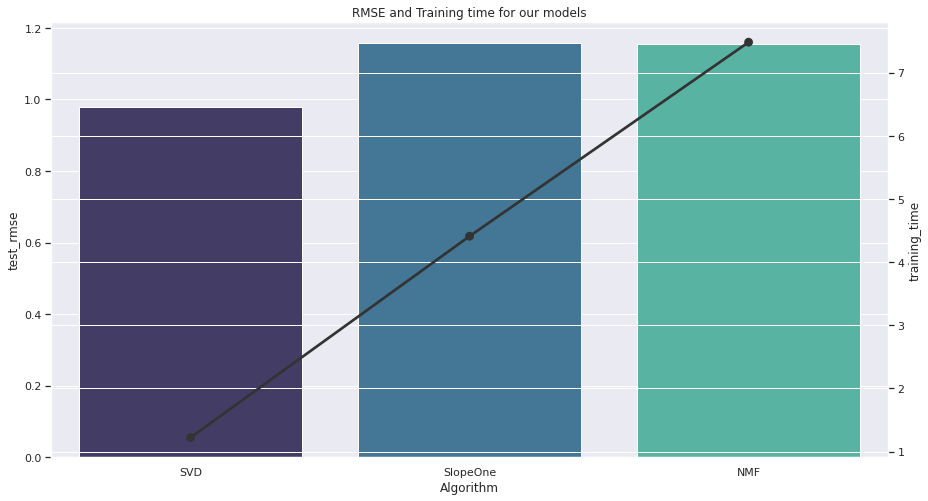

In [79]:
x_ ="Algorithm"
y_ = "test_rmse"
y_2 = "training_time"



plt.figure(figsize=(15, 8))
ax = sns.barplot(x=x_, y=y_, data=results, palette='mako')


ax2 = ax.twinx()

g2 = sns.pointplot(x=x_, y=y_2, data=results, ax=ax2, color='0.2')
plt.title("RMSE and Training time for our models")
plt.show()

As we can see, the SVD model performs better than most in terms of the RMSE as well as the training time. Therefore, the SVD will be selected as our final model. 

#### 8.2.3 Final Model and Hyperparameter Tuning

**Train-Test-Split**

In [9]:
# Test sample is made of 10% of the subset data
trainset, testset = train_test_split(data, test_size=0.10, random_state=42)

Hyperparameter tuning is the process of systematically searching for the best combination of hyperparameters for a machine learning model. Hyperparameters are parameters that are not learned during training, but are set by the user before training begins. 

In order to optimize the performance of our top-performing model, SVD, we conducted a thorough examination of various parameters. While a GridSearch is commonly used for hyperparameter tuning, the resources required exceeded the capacity of our equipment. As an alternative, we manually fine-tuned the parameters and discovered that the following values yielded the best results: 

- n_epochs: 50 
- n_factors: 400 
- init_std_dev: 0.001 
- random_state: 42.

**Training our tuned model on a subset to evaluate improvement in performance**

In [10]:
svd_test = SVD(n_epochs = 50, n_factors = 400, init_std_dev = 0.001, random_state=42)
svd_test.fit(trainset)
predictions = svd_test.test(testset)

# Calculate RMSE
svd_rmse = accuracy.rmse(predictions)

RMSE: 0.9729


After tuning the parameters of our model, we were able to achieve an improved Root Mean Squared Error (RMSE) of 0.9729. This is a notable improvement in comparison to the RMSE score of our original untuned SVD model.

**Predictions**

First let's make a dataframe that will have all the information we need:

In [24]:
colab_data = pd.merge(movies, df_links_final[["movieId", "link", "images"]], how = "left")
colab_data.head(3)

,movieId,title,genres,year,link,images
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,https://www.imdb.com/title/tt0114709/,https://image.tmdb.org/t/p/w500//uXDfjJbdP4ijW...
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",1995,https://www.imdb.com/title/tt0113497/,https://image.tmdb.org/t/p/w500//vgpXmVaVyUL7G...
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",1995,https://www.imdb.com/title/tt0113228/,https://image.tmdb.org/t/p/w500//1FSXpj5e8l4KH...


In [28]:
train_df = pd.merge(df_train, movies[["movieId", "title"]], how = "left")
train_df.head(2)

,userId,movieId,rating,timestamp,title
0,5163,57669,4.0,1518349992,In Bruges (2008)
1,106343,5,4.5,1206238739,Father of the Bride Part II (1995)


In [34]:
def collaborative(movie1,movie2, movie3, min_year = 1900):
    
    train_data = train_df
    
    #First we find all the users that watched all 3 movies and rated them above 4, ie, users with similar taste
    movies123 = train_data[(train_data["title"]==movie1)|(train_data["title"]==movie2)|(train_data["title"]==movie3)]
    movies123 = movies123[movies123["rating"]>4]
    
    #If this list is greater than 150, we take the 150 highest ratings
    if len(movies123)>150:
        movies123 = movies123.sort_values("rating").tail(150)
        
    #Next we see if there are users who watched ALL 3 movies as they would be the most similar to the user. If there isnt any
    # users then we select the users who watched 2 of the movies and then lastly 1. 
    watch_counts = pd.DataFrame(movies123["userId"].value_counts())
    max_watch_counts = watch_counts["userId"].max()
    
    #We then make a list of these users. 
    users = list(watch_counts[watch_counts["userId"]==max_watch_counts].index)
    
    #We make a list of all movieIds that are greater than the min_year specified. 
    movieid = list(set(colab_data["movieId"][colab_data["year"]>min_year-1]))
    
    #Bestmatched stores the movies we would recommend
    bestmatched = []

    
    #We then loop through each userId and movieId and predict the rating, if a certain movie title has an average greater than
    #4 amongst our users we then append the movieId in the bestmatched list
    for iid in movieid:
        movieaverage = []
        for uid in users:
            userprediction = svd_test.predict(uid, iid)[3]
            movieaverage.append(userprediction)
            
        if sum(movieaverage)/len(movieaverage)>4:
                bestmatched.append(iid)
                
                
    #Ensuring there are no duplicates         
    bestmatched = list(set(bestmatched))
    
    #Creating a dataframe for these movies that will contain their image links and imdb links
    titles = colab_data[colab_data["movieId"].isin(bestmatched) & (colab_data["year"]>min_year-1)][["title","link", "images"]].reset_index()
    
    if len(titles)>10:
        titles =titles.sample(n=10).reset_index()
    
    for i in range(len(titles)):
        display(Image.open(BytesIO(requests.get(titles["images"][i]).content)).resize((150,150)))
        print(titles["title"][i])
        print("here is a link for more information: ", titles["link"][i])
        print(" ")

Because you picked:

1)  What Dreams May Come (1998)
2)  Do You Remember Dolly Bell? (Sjecas li se, Dolly Bell) (1981)
3)  Haunting of Molly Hartley, The (2008) 

You may enjoy the following titles:


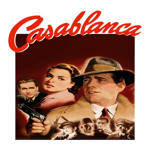

Casablanca (1942)
here is a link for more information:  https://www.imdb.com/title/tt0034583/
 


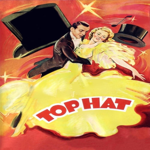

Top Hat (1935)
here is a link for more information:  https://www.imdb.com/title/tt0027125/
 


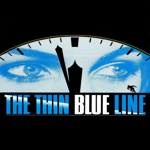

Thin Blue Line, The (1988)
here is a link for more information:  https://www.imdb.com/title/tt0096257/
 


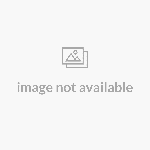

Volver (2006)
here is a link for more information:  https://www.imdb.com/title/tt0441909/
 


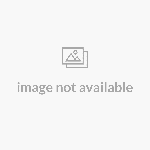

Chorus, The (Choristes, Les) (2004)
here is a link for more information:  https://www.imdb.com/title/tt0372824/
 


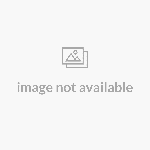

Green Mile, The (1999)
here is a link for more information:  https://www.imdb.com/title/tt0120689/
 


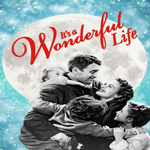

It's a Wonderful Life (1946)
here is a link for more information:  https://www.imdb.com/title/tt0038650/
 


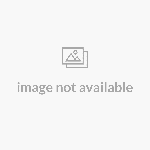

X-Men: Days of Future Past (2014)
here is a link for more information:  https://www.imdb.com/title/tt1877832/
 


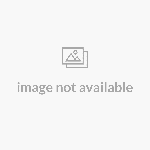

Cove, The (2009)
here is a link for more information:  https://www.imdb.com/title/tt1313104/
 


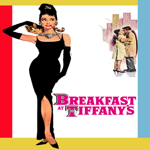

Breakfast at Tiffany's (1961)
here is a link for more information:  https://www.imdb.com/title/tt0054698/
 


In [35]:
#Lets try this on some random movies
#Feel free to select your own movies from the content_data dataframe and set them equal to movie1, movie2 and movie3

movie1 = colab_data["title"][random.randint(0, 5000)]
movie2 = colab_data["title"][random.randint(5001, 10000)]
movie3 = colab_data["title"][random.randint(10001, 15000)]

print ("Because you picked:\n")
print("1) ", movie1)
print("2) ", movie2)
print("3) ", movie3, "\n")

print("You may enjoy the following titles:")

collaborative(movie1, movie2 , movie3) #feel free to also vary the min_year parameter if you dont want movies before a certain
#year. For now we set it to 1900 so we can access more recent movies

<a id="eight.3"></a>
### 8.3 Kaggle Submission

   



As our team competes in a Kaggle competition, it's crucial for us to submit the most accurate predictions. To achieve this, we trained our fine-tuned model on the entire dataset instead of a subset. This approach allows our model to be exposed to a larger volume of user data, resulting in more accurate recommendations.

In [36]:
#Defining our reader

reader1 = Reader(rating_scale = (df_train['rating'].min(), df_train['rating'].max()))

In [37]:
#Loading our dataset from our full training dataframe

data1 = Dataset.load_from_df(df_train[['userId', 'movieId', 'rating']], reader1)

In [38]:
#Building a train set

trainset1 = data1.build_full_trainset()

In [ ]:
#Fitting our model

svd = SVD(n_epochs = 50, n_factors = 400, init_std_dev = 0.001, random_state=42, verbose=True)
svd.fit(trainset1)

**Creating a submission file:**

In [ ]:
# Create Kaggle submission file
# Make a predictions list that runs our model on our unseen data
predictions = []
for i, row in df_test.iterrows():
    x = (svd.predict(row.userId, row.movieId))
    pred = x[3]
    predictions.append(pred)
    
# Concatenate the userId and movieId column into one column, named 'Id' 
df_test['Id'] = df_test['userId'].map(str) +'_'+ df_test['movieId'].map(str)

In [ ]:
# Converting our results in a dataframe format 
results = pd.DataFrame({"Id":df_test['Id'],"rating": predictions})
results.head()

In [ ]:
# Exporting our csv submission file
results.to_csv("JM6_svd_submission.csv", index=False)

<a id="nine"></a>
## 9. Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

In this notebook, we conducted a comprehensive analysis of our user data to gain a deeper understanding of their viewing preferences. The results of this analysis were then used to fine-tune our SVD model, which ultimately proved to be the most accurate, resulting in its selection for our final submission to the Kaggle competition.

The ability to understand our customers through their data is a powerful tool that enables companies to make personalized recommendations, resulting in increased revenue. This is evident in the success of companies such as Amazon and the Google Play Store, which attribute a significant portion of their income to their recommendation systems.

Our algorithms have the potential to set Filmic apart from other streaming services by providing our users with a tailored and captivating viewing experience. The possibilities of what can be recommended are endless, from shoes and clothes, to films and music, to even people and their specific skills. We are confident that our approach will enhance the user experience and drive Filmic's growth.

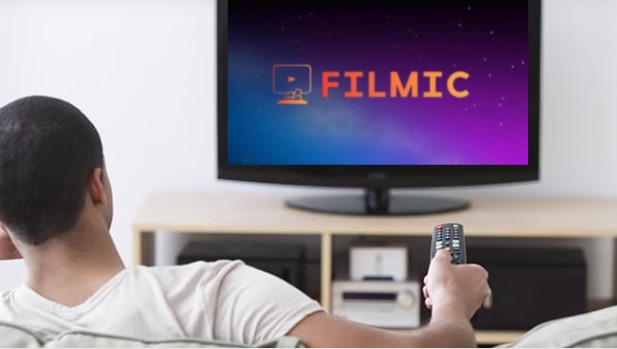

<a id="ten"></a>
## 10. Comet - End
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


---

In [ ]:
#experiment.end()

<a id="eleven"></a>
## 11. References
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


---

The notebook authors used the various research sources below:


- Root-Mean-Squared-Error explained:  https://www.geeksforgeeks.org/root-mean-square-error-in-r-programming/
- Prof Hercules Surprise Modification: https://nullsafe.dev/posts/how-to-make-surprise-10x-faster/
- Content-based Movie Recommender: https://towardsdatascience.com/essentials-of-recommendation-engines-content-based-and-collaborative-filtering-31521c964922
- Building a Movie Recommender: https://www.analyticsvidhya.com/blog/2020/11/create-your-own-movie-movie-recommendation-system/
- Prediction_algorithms package: https://surprise.readthedocs.io/en/stable/prediction_algorithms_package.html